In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error

In [2]:
# For some reason I have to manually set my backend now
%matplotlib inline

In [3]:
# Set max columns and rows displayed
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)

In [4]:
# Figured out that I need to change the encoding to read in these files
ed_data = pd.read_csv("../data/Education.csv", encoding='latin-1')
pop_data = pd.read_csv("../data/PopulationEstimates.csv", encoding='latin-1')
pov_data = pd.read_csv("../data/PovertyEstimates.csv", encoding='latin-1')
unm_data = pd.read_csv("../data/Unemployment.csv", encoding='latin-1')

In [5]:
# FIPS code looks to be called "FIPS Code"
ed_data.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18"
0,0,US,United States,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730","11,717,266",47.7,31.1,10.6,10.7,"44,535,197","45,947,035","20,794,975","21,558,480",33.5,34.6,15.7,16.2,"39,343,718","47,642,763","39,571,702","32,310,253",24.8,30.0,24.9,20.3,"35,715,625","52,168,981","49,864,428","44,462,605",19.6,28.6,27.4,24.4,"26,948,057","59,265,308","63,365,655","68,867,051",12.3,27.1,29.0,31.5
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287","141,936",58.7,25.9,7.5,7.8,"964,840","704,207","278,205","270,063",43.5,31.8,12.5,12.2,"843,638","749,591","553,512","399,228",33.1,29.4,21.7,15.7,"714,081","877,216","746,495","549,608",24.7,30.4,25.9,19.0,"470,043","1,020,172","987,148","822,595",14.2,30.9,29.9,24.9
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,767,54.8,31.1,7.7,6.4,"7,074","6,145","2,104","2,117",40.6,35.2,12.1,12.1,"6,252","6,671","4,912","3,026",30.0,32.0,23.5,14.5,"5,872","9,332","7,413","4,972",21.3,33.8,26.9,18.0,"4,204","12,119","10,552","10,291",11.3,32.6,28.4,27.7
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334","2,038",59.4,26.7,7.4,6.5,"18,125","15,380","6,602","5,498",39.7,33.7,14.5,12.1,"17,309","20,544","15,900","10,870",26.8,31.8,24.6,16.8,"17,258","28,428","28,178","22,146",18.0,29.6,29.3,23.1,"14,310","40,579","46,025","46,075",9.7,27.6,31.3,31.3
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,861,68.8,19.0,4.9,7.3,"7,759","3,671","1,362","1,300",55.1,26.1,9.7,9.2,"6,965","4,258","2,622","1,857",44.4,27.1,16.7,11.8,"6,679","6,124","4,025","2,068",35.3,32.4,21.3,10.9,"4,901","6,486","4,566","2,220",27.0,35.7,25.1,12.2


In [6]:
ed_data.shape

(3283, 47)

In [7]:
# Nothing really jumping out here, at least
ed_data.describe()

,FIPS Code,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18"
count,3283.000000,3221.000000,3221.000000,3221.000000,3221.000000,3186.000000,3186.000000,3186.000000,3186.000000,3267.000000,3267.000000,3267.000000,3267.000000,3271.000000,3271.000000,3270.000000,3271.000000,3272.000000,3272.000000,3272.000000,3272.000000,3273.000000,3273.000000,3273.000000,3273.000000
mean,31308.242766,5.057125,5.371624,4.936976,5.187830,55.163685,28.465474,8.982423,7.389140,41.178114,34.356872,13.034619,11.432323,30.887955,33.886854,21.657339,13.543534,23.068765,34.332732,25.994377,16.602567,13.700428,34.084876,30.493462,21.720104
std,16343.477485,2.701247,3.483776,2.724413,3.506753,12.804811,8.142067,3.643638,3.955551,12.997850,7.537762,4.657774,5.489187,11.023930,6.414239,6.068833,6.560537,9.279982,6.716430,5.744978,7.753507,6.645642,7.174623,5.346820,9.396977
min,0.000000,1.000000,1.000000,1.000000,1.000000,11.800000,4.400000,0.000000,0.000000,4.700000,11.000000,3.200000,1.600000,0.000000,0.000000,5.900000,0.000000,3.000000,10.900000,9.000000,4.900000,1.200000,5.500000,5.800000,0.000000
25%,19016.000000,3.000000,2.000000,2.000000,2.000000,45.500000,22.000000,6.200000,4.800000,31.700000,28.700000,9.500000,7.900000,22.800000,29.900000,17.100000,9.200000,16.100000,30.200000,21.800000,11.300000,8.800000,29.500000,27.000000,15.200000
50%,30017.000000,6.000000,5.000000,6.000000,5.000000,53.700000,29.500000,8.600000,6.500000,39.200000,35.000000,12.500000,10.000000,28.800000,33.500000,21.700000,11.800000,21.000000,34.600000,26.000000,14.600000,12.200000,34.300000,30.500000,19.500000
75%,46100.000000,7.000000,8.000000,7.000000,8.000000,65.700000,35.000000,11.300000,8.800000,51.400000,40.200000,16.100000,13.500000,38.850000,38.300000,25.900000,15.900000,29.200000,38.800000,30.025000,19.500000,17.600000,39.100000,34.100000,26.000000
max,72153.000000,9.000000,12.000000,9.000000,12.000000,93.000000,53.800000,29.000000,38.600000,82.400000,54.300000,32.000000,47.800000,73.100000,52.600000,45.200000,53.400000,65.300000,53.200000,44.900000,63.700000,66.300000,55.600000,57.300000,78.500000


In [8]:
# FIPS code here is "FIPS"
pop_data.head()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,N_POP_CHG_2010,N_POP_CHG_2011,N_POP_CHG_2012,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,Births_2010,Births_2011,Births_2012,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Deaths_2010,Deaths_2011,Deaths_2012,Deaths_2013,Deaths_2014,Deaths_2015,Deaths_2016,Deaths_2017,Deaths_2018,NATURAL_INC_2010,NATURAL_INC_2011,NATURAL_INC_2012,NATURAL_INC_2013,NATURAL_INC_2014,NATURAL_INC_2015,NATURAL_INC_2016,NATURAL_INC_2017,NATURAL_INC_2018,INTERNATIONAL_MIG_2010,INTERNATIONAL_MIG_2011,INTERNATIONAL_MIG_2012,INTERNATIONAL_MIG_2013,INTERNATIONAL_MIG_2014,INTERNATIONAL_MIG_2015,INTERNATIONAL_MIG_2016,INTERNATIONAL_MIG_2017,INTERNATIONAL_MIG_2018,DOMESTIC_MIG_2010,DOMESTIC_MIG_2011,DOMESTIC_MIG_2012,DOMESTIC_MIG_2013,DOMESTIC_MIG_2014,DOMESTIC_MIG_2015,DOMESTIC_MIG_2016,DOMESTIC_MIG_2017,DOMESTIC_MIG_2018,NET_MIG_2010,NET_MIG_2011,NET_MIG_2012,NET_MIG_2013,NET_MIG_2014,NET_MIG_2015,NET_MIG_2016,NET_MIG_2017,NET_MIG_2018,RESIDUAL_2010,RESIDUAL_2011,RESIDUAL_2012,RESIDUAL_2013,RESIDUAL_2014,RESIDUAL_2015,RESIDUAL_2016,RESIDUAL_2017,RESIDUAL_2018,GQ_ESTIMATES_BASE_2010,GQ_ESTIMATES_2010,GQ_ESTIMATES_2011,GQ_ESTIMATES_2012,GQ_ESTIMATES_2013,GQ_ESTIMATES_2014,GQ_ESTIMATES_2015,GQ_ESTIMATES_2016,GQ_ESTIMATES_2017,GQ_ESTIMATES_2018,R_birth_2011,R_birth_2012,R_birth_2013,R_birth_2014,R_birth_2015,R_birth_2016,R_birth_2017,R_birth_2018,R_death_2011,R_death_2012,R_death_2013,R_death_2014,R_death_2015,R_death_2016,R_death_2017,R_death_2018,R_NATURAL_INC_2011,R_NATURAL_INC_2012,R_NATURAL_INC_2013,R_NATURAL_INC_2014,R_NATURAL_INC_2015,R_NATURAL_INC_2016,R_NATURAL_INC_2017,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2011,R_INTERNATIONAL_MIG_2012,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_INTERNATIONAL_MIG_2017,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2011,R_DOMESTIC_MIG_2012,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
0,0.0,US,United States,NaN,NaN,NaN,NaN,NaN,"308,745,538","308,758,105","309,326,085","311,580,009","313,874,218","316,057,727","318,386,421","320,742,673","323,071,342","325,147,121","327,167,434","567,980","2,253,924","2,294,209","2,183,509","2,328,694","2,356,252","2,328,669","2,075,779","2,020,313","987,836","3,973,485","3,936,976","3,940,576","3,963,195","3,992,376","3,962,654","3,901,982","3,855,500","598,691","2,512,442","2,501,531","2,608,019","2,582,448","2,699,826","2,703,215","2,779,436","2,814,013","389,145","1,461,043","1,435,445","1,332,557","1,380,747","1,292,550","1,259,439","1,122,546","1,041,487","178,835","792,881","858,764","850,952","947,947","1,063,702","1,069,230","953,233","978,826",0,0,0,0,0,0,0,0,0,"178,835","792,881","858,764","850,952","947,947","1,063,702","1,069,230","953,233","978,826",0,0,0,0,0,0,0.0,0.0,0.0,"7,999,000","8,034,794","8,056,903","8,075,703","8,061,697","8,097,666","8,102,956","8,084,094","8,086,688","8,091,609",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000.0,AL,Alabama,NaN,NaN,NaN,NaN,NaN,"4,779,736","4,780,138","4,785,448","4,798,834","4,815,564","4,830,460","4,842,481","4,853,160","4,864,745","4,875,120","4,887,871","5,310","13,386","16,730","14,896","12,021","10,679","11,585","10,375","12,751","14,227","59,689","59,070","57,936","58,907","59,637","59,388","58,259","57,216","11,

In [9]:
# Doesn't match up with the previous frame, will have to address disparity
pop_data.shape

(3274, 149)

In [10]:
# There's really too much here to check thoroughly, but nothing looks really crazy
pop_data.describe()

,FIPS,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,RESIDUAL_2016,RESIDUAL_2017,RESIDUAL_2018,R_birth_2011,R_birth_2012,R_birth_2013,R_birth_2014,R_birth_2015,R_birth_2016,R_birth_2017,R_birth_2018,R_death_2011,R_death_2012,R_death_2013,R_death_2014,R_death_2015,R_death_2016,R_death_2017,R_death_2018,R_NATURAL_INC_2011,R_NATURAL_INC_2012,R_NATURAL_INC_2013,R_NATURAL_INC_2014,R_NATURAL_INC_2015,R_NATURAL_INC_2016,R_NATURAL_INC_2017,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2011,R_INTERNATIONAL_MIG_2012,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_INTERNATIONAL_MIG_2017,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2011,R_DOMESTIC_MIG_2012,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
count,3273.000000,3215.000000,3220.000000,3215.000000,3220.000000,3142.000000,3194.000000,3194.000000,3194.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000
mean,31358.511763,5.053810,4.937888,5.366096,5.188820,1.808402,0.000000,0.000000,0.000000,11.747667,11.645600,11.653962,11.712872,11.754494,11.658534,11.384654,11.176730,10.154807,10.081961,10.472941,10.359818,10.776073,10.742781,10.241059,10.337707,1.593110,1.564923,1.180583,1.353148,0.978766,0.915503,1.142969,0.838866,0.897870,1.020482,1.008707,1.076261,1.280301,1.287911,1.125712,1.143407,-1.865205,-2.598653,-1.610460,-1.866364,-1.688412,-1.331851,-0.138647,-0.006076,-0.967178,-1.577294,-0.601597,-0.790323,-0.408957,-0.043188,0.987723,1.138240
std,16305.188962,2.701246,2.724344,3.481577,3.506848,1.819511,26.615978,27.820146,33.206809,2.737269,2.710867,2.677889,2.677759,2.674839,2.597371,2.593150,2.511176,2.734366,2.729553,2.829241,2.771536,2.881674,2.871866,2.629621,2.680600,4.406279,4.330603,4.345847,4.298378,4.359736,4.281577,4.058655,4.043404,1.662901,2.004455,1.813284,1.932278,2.125312,2.237377,2.223603,2.265014,10.222128,11.540558,11.804015,11.081815,12.442351,13.093138,12.930164,11.400081,10.446217,11.854181,11.814311,11.150211,12.460067,13.075647,12.874758,11.319971
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-673.000000,-509.000000,-644.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,1.100000,0.000000,0.000000,0.000000,-15.600000,-16.700000,-18.400000,-17.900000,-17.100000,-24.300000,-16.200000,-14.400000,-2.000000,-1.800000,-1.400000,-1.600000,-1.400000,-1.400000,-1.300000,-3.900000,-128.200000,-99.400000,-109.900000,-174.400000,-99.600000,-124.400000,-68.800000,-62.300000,-128.200000,-99.400000,-98.800000,-174.400000,-75.500000,-108.200000,-68.300000,-62.100000
25%,19025.000000,3.000000,2.000000,2.000000,2.000000,0.000000,-2.000000,-2.000000,-2.000000,10.100000,10.000000,10.000000,10.100000,10.200000,10.100000,9.900000,9.700000,8.400000,8.300000,8.600000,8.500000,8.900000,8.900000,8.500000,8.600000,-1.200000,-1.100000,-1.600000,-1.400000,-1.800000,-1.800000,-1.500000,-1.800000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,-6.300000,-7.600000,-6.700000,-7.100000,-7.200000,-7.300000,-6.500000,-6.100000,-5.800000,-6.900000,-5.900000,-6.200000,-6.000000,-6.000000,-5.300000,-5.000000
50%,30021.000000,6.000000,6.000000,5.000000,5.00

In [11]:
# FIPS code here is "FIPStxt" but hopefully it will still read as a numeric
pov_data.head()

,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,CI90LBAll_2018,CI90UBALL_2018,PCTPOVALL_2018,CI90LBALLP_2018,CI90UBALLP_2018,POV017_2018,CI90LB017_2018,CI90UB017_2018,PCTPOV017_2018,CI90LB017P_2018,CI90UB017P_2018,POV517_2018,CI90LB517_2018,CI90UB517_2018,PCTPOV517_2018,CI90LB517P_2018,CI90UB517P_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,POV04_2018,CI90LB04_2018,CI90UB04_2018,PCTPOV04_2018,CI90LB04P_2018,CI90UB04P_2018
0,0,US,United States,NaN,NaN,NaN,NaN,"41,852,315","41,619,366","42,085,264",13.1,13.0,13.2,"12,997,532","12,873,127","13,121,937",18.0,17.8,18.2,"8,930,152","8,834,521","9,025,783",17.0,16.8,17.2,"61,937","61,843","62,031","3,758,704","3,714,862","3,802,546",19.5,19.3,19.7
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,"801,758","785,668","817,848",16.8,16.5,17.1,"255,613","247,744","263,482",23.9,23.2,24.6,"178,175","171,349","185,001",22.8,21.9,23.7,"49,881","49,123","50,639","73,915","69,990","77,840",26.0,24.6,27.4
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,"7,587","6,334","8,840",13.8,11.5,16.1,"2,509","1,965","3,053",19.3,15.1,23.5,"1,891","1,469","2,313",19.5,15.1,23.9,"59,338","53,628","65,048",NaN,NaN,NaN,NaN,NaN,NaN
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,"21,069","17,390","24,748",9.8,8.1,11.5,"6,442","4,723","8,161",13.9,10.2,17.6,"4,534","3,223","5,845",13.1,9.3,16.9,"57,588","54,437","60,739",NaN,NaN,NaN,NaN,NaN,NaN
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,"6,788","5,662","7,914",30.9,25.8,36.0,"2,242","1,788","2,696",43.9,35.0,52.8,"1,411","1,056","1,766",36.7,27.5,45.9,"34,382","31,157","37,607",NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Another, different mismatch, will have to address
pov_data.shape

(3193, 34)

In [13]:
# The last three columns only have 52 non-null rows each, that's probably state-level data which I'll drop
pov_data.describe()

,FIPStxt,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,PCTPOVALL_2018,CI90LBALLP_2018,CI90UBALLP_2018,PCTPOV017_2018,CI90LB017P_2018,CI90UB017P_2018,PCTPOV517_2018,CI90LB517P_2018,CI90UB517P_2018,PCTPOV04_2018,CI90LB04P_2018,CI90UB04P_2018
count,3193.000000,3136.000000,3136.000000,3141.000000,3141.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,52.000000,52.000000,52.000000
mean,30356.223301,5.124362,5.447704,5.009233,5.268704,15.125274,12.277513,17.973035,21.045443,15.879674,26.211212,19.823520,14.338365,25.308675,18.890385,17.446154,20.334615
std,15178.992102,2.681944,3.469504,2.708605,3.499373,6.092508,4.995706,7.289864,8.862190,6.865016,11.015383,8.732097,6.577144,11.075640,5.009648,4.975409,5.096900
min,0.000000,1.000000,1.000000,1.000000,1.000000,2.600000,2.100000,3.100000,2.500000,1.800000,3.200000,2.100000,1.400000,2.800000,10.600000,9.400000,11.800000
25%,18173.000000,3.000000,2.000000,2.000000,2.000000,10.800000,8.700000,12.800000,14.500000,10.900000,17.900000,13.300000,9.400000,17.100000,15.000000,13.575000,16.200000
50%,29175.000000,6.000000,5.000000,6.000000,5.000000,14.100000,11.400000,16.700000,20.100000,15.000000,24.900000,18.700000,13.400000,23.800000,18.400000,16.800000,20.000000
75%,45075.000000,7.000000,8.000000,7.000000,8.000000,18.300000,14.900000,21.800000,26.200000,19.900000,32.600000,24.700000,17.800000,31.600000,22.475000,21.025000,23.550000
max,56045.000000,9.000000,12.000000,9.000000,12.000000,54.000000,47.400000,60.600000,68.300000,57.500000,79.100000,66.500000,54.800000,80.500000,30.800000,29.000000,32.600000


In [14]:
# FIPS code here looks to be called "FIPS"
unm_data.head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,Unemployment_rate_2008,Civilian_labor_force_2009,Employed_2009,Unemployed_2009,Unemployment_rate_2009,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,Employed_2012,Unemployed_2012,Unemployment_rate_2012,Civilian_labor_force_2013,Employed_2013,Unemployed_2013,Unemployment_rate_2013,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018
0,0,US,United States,NaN,NaN,NaN,"152,191,093","145,156,134","7,034,959",4.6,153761095,144860350,8900745,5.8,"153,825,455","139,594,698","14,230,757",9.3,"154,270,732","139,408,204","14,862,528",9.6,"154,606,316","140,765,809","13,840,507",9.0,"155,119,195","142,600,402","12,518,793",8.1,"155,485,692","144,018,151","11,467,541",7.4,"155,957,297","146,338,305","9,618,992",6.2,"156,866,585","148,579,026","8,287,559",5.3,"158,708,795","150,981,151","7,727,644",4.9,"160,273,906","153,293,830","6,980,076",4.4,"161,640,488","155,344,043","6,296,445",3.9,"$61,937",NaN
1,1000,AL,Alabama,NaN,NaN,NaN,"2,175,612","2,089,127","86,485",4.0,"2,176,489","2,053,477","123,012",5.7,2162999,1924747,238252,11.0,"2,196,042","1,964,559","231,483",10.5,"2,202,670","1,990,413","212,257",9.6,"2,176,337","2,003,290","173,047",8.0,"2,174,000","2,017,043","156,957",7.2,"2,160,842","2,014,290","146,552",6.8,"2,158,293","2,026,898","131,395",6.1,"2,177,209","2,049,971","127,238",5.8,2178243,2081676,96567,4.4,"2,198,837","2,112,347","86,490",3.9,"$49,881",100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,"24,383","23,577",806,3.3,"24,687","23,420","1,267",5.1,24703,22301,2402,9.7,"25,713","23,431","2,282",8.9,"25,836","23,677","2,159",8.4,"25,740","23,961","1,779",6.9,"25,810","24,205","1,605",6.2,"25,592","24,097","1,495",5.8,"25,613","24,283","1,330",5.2,"25,966","24,645","1,321",5.1,25972,24958,1014,3.9,"25,957","25,015",942,3.6,"$59,338",119.0
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,"82,659","80,099","2,560",3.1,"83,223","79,372","3,851",4.6,82451,74403,8048,9.8,"83,459","75,120","8,339",10.0,"85,045","77,418","7,627",9.0,"84,414","78,065","6,349",7.5,"85,280","79,626","5,654",6.6,"86,384","81,083","5,301",6.1,"87,741","82,882","4,859",5.5,"90,670","85,839","4,831",5.3,92090,88342,3748,4.1,"93,849","90,456","3,393",3.6,"$57,588",115.5
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,"10,334","9,684",650,6.3,"10,161","9,267",894,8.8,10003,8572,1431,14.3,"10,221","8,959","1,262",12.3,"9,849","8,712","1,137",11.5,"9,362","8,283","1,079",11.5,"9,099","8,168",931,10.2,"8,845","7,913",932,10.5,"8,613","7,848",765,8.9,"8,417","7,717",700,8.3,8317,7831,486,5.8,"8,373","7,940",433,5.2,"$34,382",68.9


In [15]:
# Because what we needed here was ANOTHER different number
unm_data.shape

(3275, 56)

In [16]:
# Nothing immediately appearing terrible
unm_data.describe()

,FIPS,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Unemployment_rate_2007,Unemployment_rate_2008,Unemployment_rate_2009,Unemployment_rate_2010,Unemployment_rate_2011,Unemployment_rate_2012,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018
count,3275.000000,3219.000000,3219.000000,3222.000000,3270.000000,3270.000000,3270.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3192.000000
mean,31336.829618,4.938490,5.189811,0.382992,5.064098,6.000826,9.256116,9.594407,8.957855,8.074328,7.613509,6.497219,5.742054,5.437775,4.796180,4.296608,89.612657
std,16321.509704,2.724553,3.506942,0.486192,2.124528,2.377558,3.487893,3.498911,3.379012,3.149460,3.132733,2.864458,2.459505,2.351220,2.170849,1.884719,19.961018
min,0.000000,1.000000,1.000000,0.000000,1.500000,1.300000,2.100000,2.100000,1.400000,1.100000,1.200000,1.200000,1.800000,1.700000,1.500000,1.300000,43.700000
25%,19022.000000,2.000000,2.000000,0.000000,3.700000,4.400000,6.900000,7.300000,6.700000,6.000000,5.500000,4.700000,4.200000,4.000000,3.500000,3.175000,76.400000
50%,30019.000000,6.000000,5.000000,0.000000,4.700000,5.700000,8.800000,9.300000,8.700000,7.800000,7.300000,6.100000,5.300000,5.000000,4.400000,3.900000,87.200000
75%,46100.000000,7.000000,8.000000,1.000000,5.800000,7.100000,11.100000,11.500000,10.700000,9.700000,9.100000,7.600000,6.600000,6.200000,5.400000,4.900000,99.900000
max,72153.000000,9.000000,12.000000,1.000000,20.400000,22.600000,27.400000,28.800000,28.900000,27.400000,27.400000,26.400000,24.500000,24.100000,20.600000,19.900000,263.600000


In [17]:
# FIPS Code is int, hopefully the equivalents in other frames are as well
ed_data.dtypes

FIPS Code                                                                     int64
State                                                                        object
Area name                                                                    object
2003 Rural-urban Continuum Code                                             float64
2003 Urban Influence Code                                                   float64
2013 Rural-urban Continuum Code                                             float64
2013 Urban Influence Code                                                   float64
Less than a high school diploma, 1970                                        object
High school diploma only, 1970                                               object
Some college (1-3 years), 1970                                               object
Four years of college or higher, 1970                                        object
Percent of adults with less than a high school diploma, 1970                

In [18]:
# Wow, think this has enough columns? Also, FIPS is float, which may mean there's a null
pop_data.dtypes

FIPS                               float64
State                               object
Area_Name                           object
Rural-urban_Continuum Code_2003    float64
Rural-urban_Continuum Code_2013    float64
Urban_Influence_Code_2003          float64
Urban_Influence_Code_2013          float64
Economic_typology_2015             float64
CENSUS_2010_POP                     object
ESTIMATES_BASE_2010                 object
POP_ESTIMATE_2010                   object
POP_ESTIMATE_2011                   object
POP_ESTIMATE_2012                   object
POP_ESTIMATE_2013                   object
POP_ESTIMATE_2014                   object
POP_ESTIMATE_2015                   object
POP_ESTIMATE_2016                   object
POP_ESTIMATE_2017                   object
POP_ESTIMATE_2018                   object
N_POP_CHG_2010                      object
N_POP_CHG_2011                      object
N_POP_CHG_2012                      object
N_POP_CHG_2013                      object
N_POP_CHG_2

In [19]:
# Good - in spite of its name, FIPStxt is int
pov_data.dtypes

FIPStxt                              int64
Stabr                               object
Area_name                           object
Rural-urban_Continuum_Code_2003    float64
Urban_Influence_Code_2003          float64
Rural-urban_Continuum_Code_2013    float64
Urban_Influence_Code_2013          float64
POVALL_2018                         object
CI90LBAll_2018                      object
CI90UBALL_2018                      object
PCTPOVALL_2018                     float64
CI90LBALLP_2018                    float64
CI90UBALLP_2018                    float64
POV017_2018                         object
CI90LB017_2018                      object
CI90UB017_2018                      object
PCTPOV017_2018                     float64
CI90LB017P_2018                    float64
CI90UB017P_2018                    float64
POV517_2018                         object
CI90LB517_2018                      object
CI90UB517_2018                      object
PCTPOV517_2018                     float64
CI90LB517P_

In [20]:
# Looks like there's some leading whitespace to be dealt with in the column names, but FIPS is int
unm_data.dtypes

FIPS                                           int64
State                                         object
Area_name                                     object
Rural_urban_continuum_code_2013              float64
Urban_influence_code_2013                    float64
Metro_2013                                   float64
 Civilian_labor_force_2007                    object
 Employed_2007                                object
 Unemployed_2007                              object
Unemployment_rate_2007                       float64
 Civilian_labor_force_2008                    object
 Employed_2008                                object
 Unemployed_2008                              object
Unemployment_rate_2008                       float64
Civilian_labor_force_2009                     object
Employed_2009                                 object
Unemployed_2009                               object
Unemployment_rate_2009                       float64
 Civilian_labor_force_2010                    

In [21]:
# Reading in shape file using geopandas
geo = gpd.read_file("../data/cb_2015_us_county_20m/cb_2015_us_county_20m.shp")

In [22]:
# FIPS code appears to be "GEOID" here
geo.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,20,175,00485050,0500000US20175,20175,Seward,06,1655865960,2777350,"POLYGON ((-101.06790 37.38778, -100.65273 37.3..."
1,28,141,00695791,0500000US28141,28141,Tishomingo,06,1098939230,52359814,"POLYGON ((-88.36353 34.99575, -88.25811 34.995..."
2,36,101,00974148,0500000US36101,36101,Steuben,06,3601566799,34993606,"POLYGON ((-77.72296 42.47122, -77.72062 42.535..."
3,50,013,01461763,0500000US50013,50013,Grand Isle,06,211894597,292303559,"POLYGON ((-73.38997 44.61962, -73.36556 44.700..."
4,05,065,00066860,0500000US05065,05065,Izard,06,1503685418,8912603,"POLYGON ((-92.21390 36.17510, -92.15986 36.173..."


In [23]:
# A fifth number, joy
geo.shape

(3220, 10)

In [24]:
# Converting the GeoDataFrame to a DataFrame
geo_data = pd.DataFrame(geo)

In [25]:
# May need this list later, might as well
dataset = [ed_data, pop_data, pov_data, unm_data, geo_data]

In [26]:
# GEOID is an object, need to get that to int
geo_data.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
AFFGEOID      object
GEOID         object
NAME          object
LSAD          object
ALAND          int64
AWATER         int64
geometry    geometry
dtype: object

In [27]:
# Converting FIPS equivalent to int type
geo_data['GEOID'] = geo_data['GEOID'].astype(int)

In [28]:
# Checking - it worked. 
geo_data.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
AFFGEOID      object
GEOID          int64
NAME          object
LSAD          object
ALAND          int64
AWATER         int64
geometry    geometry
dtype: object

In [29]:
# Now to deal with that float type
pop_data.dtypes

FIPS                               float64
State                               object
Area_Name                           object
Rural-urban_Continuum Code_2003    float64
Rural-urban_Continuum Code_2013    float64
Urban_Influence_Code_2003          float64
Urban_Influence_Code_2013          float64
Economic_typology_2015             float64
CENSUS_2010_POP                     object
ESTIMATES_BASE_2010                 object
POP_ESTIMATE_2010                   object
POP_ESTIMATE_2011                   object
POP_ESTIMATE_2012                   object
POP_ESTIMATE_2013                   object
POP_ESTIMATE_2014                   object
POP_ESTIMATE_2015                   object
POP_ESTIMATE_2016                   object
POP_ESTIMATE_2017                   object
POP_ESTIMATE_2018                   object
N_POP_CHG_2010                      object
N_POP_CHG_2011                      object
N_POP_CHG_2012                      object
N_POP_CHG_2013                      object
N_POP_CHG_2

In [30]:
# There is indeed a null FIPS, but everything else is null as well, so it's just a dud row to drop. 
pop_data[pop_data['FIPS'].isnull()]

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,N_POP_CHG_2010,N_POP_CHG_2011,N_POP_CHG_2012,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,Births_2010,Births_2011,Births_2012,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Deaths_2010,Deaths_2011,Deaths_2012,Deaths_2013,Deaths_2014,Deaths_2015,Deaths_2016,Deaths_2017,Deaths_2018,NATURAL_INC_2010,NATURAL_INC_2011,NATURAL_INC_2012,NATURAL_INC_2013,NATURAL_INC_2014,NATURAL_INC_2015,NATURAL_INC_2016,NATURAL_INC_2017,NATURAL_INC_2018,INTERNATIONAL_MIG_2010,INTERNATIONAL_MIG_2011,INTERNATIONAL_MIG_2012,INTERNATIONAL_MIG_2013,INTERNATIONAL_MIG_2014,INTERNATIONAL_MIG_2015,INTERNATIONAL_MIG_2016,INTERNATIONAL_MIG_2017,INTERNATIONAL_MIG_2018,DOMESTIC_MIG_2010,DOMESTIC_MIG_2011,DOMESTIC_MIG_2012,DOMESTIC_MIG_2013,DOMESTIC_MIG_2014,DOMESTIC_MIG_2015,DOMESTIC_MIG_2016,DOMESTIC_MIG_2017,DOMESTIC_MIG_2018,NET_MIG_2010,NET_MIG_2011,NET_MIG_2012,NET_MIG_2013,NET_MIG_2014,NET_MIG_2015,NET_MIG_2016,NET_MIG_2017,NET_MIG_2018,RESIDUAL_2010,RESIDUAL_2011,RESIDUAL_2012,RESIDUAL_2013,RESIDUAL_2014,RESIDUAL_2015,RESIDUAL_2016,RESIDUAL_2017,RESIDUAL_2018,GQ_ESTIMATES_BASE_2010,GQ_ESTIMATES_2010,GQ_ESTIMATES_2011,GQ_ESTIMATES_2012,GQ_ESTIMATES_2013,GQ_ESTIMATES_2014,GQ_ESTIMATES_2015,GQ_ESTIMATES_2016,GQ_ESTIMATES_2017,GQ_ESTIMATES_2018,R_birth_2011,R_birth_2012,R_birth_2013,R_birth_2014,R_birth_2015,R_birth_2016,R_birth_2017,R_birth_2018,R_death_2011,R_death_2012,R_death_2013,R_death_2014,R_death_2015,R_death_2016,R_death_2017,R_death_2018,R_NATURAL_INC_2011,R_NATURAL_INC_2012,R_NATURAL_INC_2013,R_NATURAL_INC_2014,R_NATURAL_INC_2015,R_NATURAL_INC_2016,R_NATURAL_INC_2017,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2011,R_INTERNATIONAL_MIG_2012,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_INTERNATIONAL_MIG_2017,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2011,R_DOMESTIC_MIG_2012,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
3273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Dropping any fully null rows
pop_data.dropna(how='all', inplace=True)

In [32]:
# And now converting FIPS to int
pop_data['FIPS'] = pop_data['FIPS'].astype(int)

In [33]:
# Success on both counts
pop_data.dtypes

FIPS                                 int64
State                               object
Area_Name                           object
Rural-urban_Continuum Code_2003    float64
Rural-urban_Continuum Code_2013    float64
Urban_Influence_Code_2003          float64
Urban_Influence_Code_2013          float64
Economic_typology_2015             float64
CENSUS_2010_POP                     object
ESTIMATES_BASE_2010                 object
POP_ESTIMATE_2010                   object
POP_ESTIMATE_2011                   object
POP_ESTIMATE_2012                   object
POP_ESTIMATE_2013                   object
POP_ESTIMATE_2014                   object
POP_ESTIMATE_2015                   object
POP_ESTIMATE_2016                   object
POP_ESTIMATE_2017                   object
POP_ESTIMATE_2018                   object
N_POP_CHG_2010                      object
N_POP_CHG_2011                      object
N_POP_CHG_2012                      object
N_POP_CHG_2013                      object
N_POP_CHG_2

In [34]:
# Shapes were problematic, let's have a look
for frame in dataset:
    print(frame.shape)

(3283, 47)
(3273, 149)
(3193, 34)
(3275, 56)
(3220, 10)


In [35]:
# I'll join them and then figure out what data is missing and how best to deal with it
# Checking if FIPS is unique in each and setting it as the index
ed_data[ed_data['FIPS Code'].duplicated()]

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18"


In [36]:
# Keeping it as a column here because it does encode some data (e.g. full states end in 0)
ed_data.set_index('FIPS Code', inplace=True, drop=False)

In [37]:
pop_data[pop_data['FIPS'].duplicated()]

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,N_POP_CHG_2010,N_POP_CHG_2011,N_POP_CHG_2012,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,Births_2010,Births_2011,Births_2012,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Deaths_2010,Deaths_2011,Deaths_2012,Deaths_2013,Deaths_2014,Deaths_2015,Deaths_2016,Deaths_2017,Deaths_2018,NATURAL_INC_2010,NATURAL_INC_2011,NATURAL_INC_2012,NATURAL_INC_2013,NATURAL_INC_2014,NATURAL_INC_2015,NATURAL_INC_2016,NATURAL_INC_2017,NATURAL_INC_2018,INTERNATIONAL_MIG_2010,INTERNATIONAL_MIG_2011,INTERNATIONAL_MIG_2012,INTERNATIONAL_MIG_2013,INTERNATIONAL_MIG_2014,INTERNATIONAL_MIG_2015,INTERNATIONAL_MIG_2016,INTERNATIONAL_MIG_2017,INTERNATIONAL_MIG_2018,DOMESTIC_MIG_2010,DOMESTIC_MIG_2011,DOMESTIC_MIG_2012,DOMESTIC_MIG_2013,DOMESTIC_MIG_2014,DOMESTIC_MIG_2015,DOMESTIC_MIG_2016,DOMESTIC_MIG_2017,DOMESTIC_MIG_2018,NET_MIG_2010,NET_MIG_2011,NET_MIG_2012,NET_MIG_2013,NET_MIG_2014,NET_MIG_2015,NET_MIG_2016,NET_MIG_2017,NET_MIG_2018,RESIDUAL_2010,RESIDUAL_2011,RESIDUAL_2012,RESIDUAL_2013,RESIDUAL_2014,RESIDUAL_2015,RESIDUAL_2016,RESIDUAL_2017,RESIDUAL_2018,GQ_ESTIMATES_BASE_2010,GQ_ESTIMATES_2010,GQ_ESTIMATES_2011,GQ_ESTIMATES_2012,GQ_ESTIMATES_2013,GQ_ESTIMATES_2014,GQ_ESTIMATES_2015,GQ_ESTIMATES_2016,GQ_ESTIMATES_2017,GQ_ESTIMATES_2018,R_birth_2011,R_birth_2012,R_birth_2013,R_birth_2014,R_birth_2015,R_birth_2016,R_birth_2017,R_birth_2018,R_death_2011,R_death_2012,R_death_2013,R_death_2014,R_death_2015,R_death_2016,R_death_2017,R_death_2018,R_NATURAL_INC_2011,R_NATURAL_INC_2012,R_NATURAL_INC_2013,R_NATURAL_INC_2014,R_NATURAL_INC_2015,R_NATURAL_INC_2016,R_NATURAL_INC_2017,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2011,R_INTERNATIONAL_MIG_2012,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_INTERNATIONAL_MIG_2017,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2011,R_DOMESTIC_MIG_2012,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018


In [38]:
pop_data.set_index('FIPS', inplace=True)

In [39]:
pov_data[pov_data['FIPStxt'].duplicated()]

,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,CI90LBAll_2018,CI90UBALL_2018,PCTPOVALL_2018,CI90LBALLP_2018,CI90UBALLP_2018,POV017_2018,CI90LB017_2018,CI90UB017_2018,PCTPOV017_2018,CI90LB017P_2018,CI90UB017P_2018,POV517_2018,CI90LB517_2018,CI90UB517_2018,PCTPOV517_2018,CI90LB517P_2018,CI90UB517P_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,POV04_2018,CI90LB04_2018,CI90UB04_2018,PCTPOV04_2018,CI90LB04P_2018,CI90UB04P_2018


In [40]:
pov_data.set_index('FIPStxt', inplace=True)

In [41]:
unm_data[unm_data['FIPS'].duplicated()]

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,Unemployment_rate_2008,Civilian_labor_force_2009,Employed_2009,Unemployed_2009,Unemployment_rate_2009,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,Employed_2012,Unemployed_2012,Unemployment_rate_2012,Civilian_labor_force_2013,Employed_2013,Unemployed_2013,Unemployment_rate_2013,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018


In [42]:
unm_data.set_index('FIPS', inplace=True)

In [43]:
geo_data[geo_data['GEOID'].duplicated()]

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry


In [44]:
geo_data.set_index('GEOID', inplace=True)

In [45]:
# Let's join them up on their FIPS index! And yes, the variable name is facetious
big_data = ed_data.join(pop_data, how='outer', rsuffix='pop').join(pov_data, how='outer', rsuffix='pov').join(unm_data, how='outer', rsuffix='unm', sort=True).join(geo_data, how='outer', rsuffix='geo', sort=True)

In [46]:
# Looking as expected
big_data.shape

(3283, 292)

In [47]:
# It's so beautiful
big_data.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Statepop,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,N_POP_CHG_2010,N_POP_CHG_2011,N_POP_CHG_2012,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,Births_2010,Births_2011,Births_2012,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Deaths_2010,Deaths_2011,Deaths_2012,Deaths_2013,Deaths_2014,Deaths_2015,Deaths_2016,Deaths_2017,Deaths_2018,NATURAL_INC_2010,NATURAL_INC_2011,NATURAL_INC_2012,NATURAL_INC_2013,NATURAL_INC_2014,NATURAL_INC_2015,NATURAL_INC_2016,NATURAL_INC_2017,NATURAL_INC_2018,INTERNATIONAL_MIG_2010,INTERNATIONAL_MIG_2011,INTERNATIONAL_MIG_2012,INTERNATIONAL_MIG_2013,INTERNATIONAL_MIG_2014,INTERNATIONAL_MIG_2015,INTERNATIONAL_MIG_2016,INTERNATIONAL_MIG_2017,INTERNATIONAL_MIG_2018,DOMESTIC_MIG_2010,DOMESTIC_MIG_2011,DOMESTIC_MIG_2012,DOMESTIC_MIG_2013,DOMESTIC_MIG_2014,DOMESTIC_MIG_2015,DOMESTIC_MIG_2016,DOMESTIC_MIG_2017,DOMESTIC_MIG_2018,NET_MIG_2010,NET_MIG_2011,NET_MIG_2012,NET_MIG_2013,NET_MIG_2014,NET_MIG_2015,NET_MIG_2016,NET_MIG_2017,NET_MIG_2018,RESIDUAL_2010,RESIDUAL_2011,RESIDUAL_2012,RESIDUAL_2013,RESIDUAL_2014,RESIDUAL_2015,RESIDUAL_2016,RESIDUAL_2017,RESIDUAL_2018,GQ_ESTIMATES_BASE_2010,GQ_ESTIMATES_2010,GQ_ESTIMATES_2011,GQ_ESTIMATES_2012,GQ_ESTIMATES_2013,GQ_ESTIMATES_2014,GQ_ESTIMATES_2015,GQ_ESTIMATES_2016,GQ_ESTIMATES_2017,GQ_ESTIMATES_2018,R_birth_2011,R_birth_2012,R_birth_2013,R_birth_2014,R_birth_2015,R_birth_2016,R_birth_2017,R_birth_2018,R_death_2011,R_death_2012,R_death_2013,R_death_2014,R_deat

In [48]:
# So, uh every row has at least one null. That's not cool. 
big_data.isna().any(axis=1).sum()

3283

In [49]:
# Saving so I have a backup of this
#big_data.to_csv("../data/outer_join.csv")

In [50]:
# Dropping the state-level data which was mostly null
big_data.drop(['POV04_2018', 'CI90LB04_2018', 'CI90UB04_2018', 'PCTPOV04_2018', 'CI90LB04P_2018', 'CI90UB04P_2018'], axis=1, inplace=True)

In [51]:
# Okay, now there are a reasonable number of rows with nulls
big_data.isna().any(axis=1).sum()

158

In [52]:
# Looking at all the rows with nulls which aren't full states (or the entire country). Commented this out 
# because it is huge and mostly Puerto Rico and Alaska
#big_data[big_data.isna().any(axis=1)][big_data['FIPS Code'] % 10 != 0]

In [53]:
# Same as above, but filtering out Puerto Rico and Alaska because I'll likely drop them for tidiness
big_data[big_data.isna().any(axis=1)][big_data['FIPS Code'] % 10 != 0][big_data['State'] != 'PR'][big_data['State'] != 'AK']

<ipython-input-53-500a4fdd1c6e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  big_data[big_data.isna().any(axis=1)][big_data['FIPS Code'] % 10 != 0][big_data['State'] != 'PR'][big_data['State'] != 'AK']


,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Statepop,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,N_POP_CHG_2010,N_POP_CHG_2011,N_POP_CHG_2012,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,Births_2010,Births_2011,Births_2012,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Deaths_2010,Deaths_2011,Deaths_2012,Deaths_2013,Deaths_2014,Deaths_2015,Deaths_2016,Deaths_2017,Deaths_2018,NATURAL_INC_2010,NATURAL_INC_2011,NATURAL_INC_2012,NATURAL_INC_2013,NATURAL_INC_2014,NATURAL_INC_2015,NATURAL_INC_2016,NATURAL_INC_2017,NATURAL_INC_2018,INTERNATIONAL_MIG_2010,INTERNATIONAL_MIG_2011,INTERNATIONAL_MIG_2012,INTERNATIONAL_MIG_2013,INTERNATIONAL_MIG_2014,INTERNATIONAL_MIG_2015,INTERNATIONAL_MIG_2016,INTERNATIONAL_MIG_2017,INTERNATIONAL_MIG_2018,DOMESTIC_MIG_2010,DOMESTIC_MIG_2011,DOMESTIC_MIG_2012,DOMESTIC_MIG_2013,DOMESTIC_MIG_2014,DOMESTIC_MIG_2015,DOMESTIC_MIG_2016,DOMESTIC_MIG_2017,DOMESTIC_MIG_2018,NET_MIG_2010,NET_MIG_2011,NET_MIG_2012,NET_MIG_2013,NET_MIG_2014,NET_MIG_2015,NET_MIG_2016,NET_MIG_2017,NET_MIG_2018,RESIDUAL_2010,RESIDUAL_2011,RESIDUAL_2012,RESIDUAL_2013,RESIDUAL_2014,RESIDUAL_2015,RESIDUAL_2016,RESIDUAL_2017,RESIDUAL_2018,GQ_ESTIMATES_BASE_2010,GQ_ESTIMATES_2010,GQ_ESTIMATES_2011,GQ_ESTIMATES_2012,GQ_ESTIMATES_2013,GQ_ESTIMATES_2014,GQ_ESTIMATES_2015,GQ_ESTIMATES_2016,GQ_ESTIMATES_2017,GQ_ESTIMATES_2018,R_birth_2011,R_birth_2012,R_birth_2013,R_birth_2014,R_birth_2015,R_birth_2016,R_birth_2017,R_birth_2018,R_death_2011,R_death_2012,R_death_2013,R_death_2014,R_deat

In [54]:
# There's clearly an issue with counties being created from or merged into existing counties, ESPECIALLY with
# independent cities in Virginia. To the external research!

In [55]:
# The external research (thanks, Census Bureau!): https://www.census.gov/programs-surveys/geography/technical-documentation/county-changes.html
# Also, shoutout to NOAA for this FIPS converter: https://erddap.incois.gov.in/erddap/convert/fipscounty.html

In [56]:
# I'm going to need to aggregate counties which have exchanged significant amounts of territory or population in order
# to continue, so this seems like a prudent time to decide which features I definitely won't be using

In [57]:
# Just getting a full list of columns and types
big_data.dtypes

FIPS Code                                                                      int64
State                                                                         object
Area name                                                                     object
2003 Rural-urban Continuum Code                                              float64
2003 Urban Influence Code                                                    float64
2013 Rural-urban Continuum Code                                              float64
2013 Urban Influence Code                                                    float64
Less than a high school diploma, 1970                                         object
High school diploma only, 1970                                                object
Some college (1-3 years), 1970                                                object
Four years of college or higher, 1970                                         object
Percent of adults with less than a high school diploma, 1970     

In [58]:
# Just getting more familiar with the structure of the data
big_data.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Statepop,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,N_POP_CHG_2010,N_POP_CHG_2011,N_POP_CHG_2012,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,Births_2010,Births_2011,Births_2012,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Deaths_2010,Deaths_2011,Deaths_2012,Deaths_2013,Deaths_2014,Deaths_2015,Deaths_2016,Deaths_2017,Deaths_2018,NATURAL_INC_2010,NATURAL_INC_2011,NATURAL_INC_2012,NATURAL_INC_2013,NATURAL_INC_2014,NATURAL_INC_2015,NATURAL_INC_2016,NATURAL_INC_2017,NATURAL_INC_2018,INTERNATIONAL_MIG_2010,INTERNATIONAL_MIG_2011,INTERNATIONAL_MIG_2012,INTERNATIONAL_MIG_2013,INTERNATIONAL_MIG_2014,INTERNATIONAL_MIG_2015,INTERNATIONAL_MIG_2016,INTERNATIONAL_MIG_2017,INTERNATIONAL_MIG_2018,DOMESTIC_MIG_2010,DOMESTIC_MIG_2011,DOMESTIC_MIG_2012,DOMESTIC_MIG_2013,DOMESTIC_MIG_2014,DOMESTIC_MIG_2015,DOMESTIC_MIG_2016,DOMESTIC_MIG_2017,DOMESTIC_MIG_2018,NET_MIG_2010,NET_MIG_2011,NET_MIG_2012,NET_MIG_2013,NET_MIG_2014,NET_MIG_2015,NET_MIG_2016,NET_MIG_2017,NET_MIG_2018,RESIDUAL_2010,RESIDUAL_2011,RESIDUAL_2012,RESIDUAL_2013,RESIDUAL_2014,RESIDUAL_2015,RESIDUAL_2016,RESIDUAL_2017,RESIDUAL_2018,GQ_ESTIMATES_BASE_2010,GQ_ESTIMATES_2010,GQ_ESTIMATES_2011,GQ_ESTIMATES_2012,GQ_ESTIMATES_2013,GQ_ESTIMATES_2014,GQ_ESTIMATES_2015,GQ_ESTIMATES_2016,GQ_ESTIMATES_2017,GQ_ESTIMATES_2018,R_birth_2011,R_birth_2012,R_birth_2013,R_birth_2014,R_birth_2015,R_birth_2016,R_birth_2017,R_birth_2018,R_death_2011,R_death_2012,R_death_2013,R_death_2014,R_deat

In [59]:
# Wait, what is this?
big_data['LSAD'].value_counts()

06    3007
13      78
15      64
25      40
04      13
05      10
03       4
12       2
00       2
Name: LSAD, dtype: int64

In [60]:
# Ah, okay, don't think I need this: https://www.census.gov/library/reference/code-lists/legal-status-codes.html

In [61]:
# Taking a smaller slice of the columns to work on for a first pass
big_slice = big_data[[
        'FIPS Code',
    'State',
    'Area name',
    '2013 Rural-urban Continuum Code',
    '2013 Urban Influence Code',
    "Percent of adults with less than a high school diploma, 2014-18",
    'Percent of adults with a high school diploma only, 2014-18',
    "Percent of adults completing some college or associate's degree, 2014-18",
    "Percent of adults with a bachelor's degree or higher, 2014-18",
    'Economic_typology_2015',
    'POP_ESTIMATE_2010',
    'POP_ESTIMATE_2018',
    'R_NATURAL_INC_2018',
    'R_NET_MIG_2018',
    'PCTPOVALL_2018',
    'Unemployment_rate_2010',
    'Unemployment_rate_2018',
    'Median_Household_Income_2018',
    'geometry'
]]

In [62]:
big_slice.head()

,FIPS Code,State,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Economic_typology_2015,POP_ESTIMATE_2010,POP_ESTIMATE_2018,R_NATURAL_INC_2018,R_NET_MIG_2018,PCTPOVALL_2018,Unemployment_rate_2010,Unemployment_rate_2018,Median_Household_Income_2018,geometry
0,0,US,United States,NaN,NaN,12.3,27.1,29.0,31.5,NaN,"309,326,085","327,167,434",NaN,NaN,13.1,9.6,3.9,"$61,937",None
1000,1000,AL,Alabama,NaN,NaN,14.2,30.9,29.9,24.9,NaN,"4,785,448","4,887,871",0.8,1.9,16.8,10.5,3.9,"$49,881",None
1001,1001,AL,Autauga County,2.0,2.0,11.3,32.6,28.4,27.7,0.0,"54,754","55,601",2.2,0.6,13.8,8.9,3.6,"$59,338","POLYGON ((-86.91759 32.66417, -86.71339 32.661..."
1003,1003,AL,Baldwin County,3.0,2.0,9.7,27.6,31.3,31.3,5.0,"183,111","218,022",0.1,24.8,9.8,10.0,3.6,"$57,588","POLYGON ((-88.02632 30.75336, -87.94455 30.827..."
1005,1005,AL,Barbour County,6.0,6.0,27.0,35.7,25.1,12.2,3.0,"27,330","24,881",-2.5,-8.6,30.9,12.3,5.2,"$34,382","POLYGON ((-85.73573 31.62449, -85.66565 31.786..."


In [63]:
# Getting rid of Alaska, Hawaii, Puerto Rico, and the state and nation-level rows
data = big_slice.drop(big_slice[(big_slice['State'] == 'PR') | (big_slice['State'] == 'AK') | (big_slice['State'] == 'HI') | (big_slice['FIPS Code'] % 1000 == 0)].index)
data.shape

(3111, 19)

In [64]:
# Looks good
data.head()

,FIPS Code,State,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Economic_typology_2015,POP_ESTIMATE_2010,POP_ESTIMATE_2018,R_NATURAL_INC_2018,R_NET_MIG_2018,PCTPOVALL_2018,Unemployment_rate_2010,Unemployment_rate_2018,Median_Household_Income_2018,geometry
1001,1001,AL,Autauga County,2.0,2.0,11.3,32.6,28.4,27.7,0.0,"54,754","55,601",2.2,0.6,13.8,8.9,3.6,"$59,338","POLYGON ((-86.91759 32.66417, -86.71339 32.661..."
1003,1003,AL,Baldwin County,3.0,2.0,9.7,27.6,31.3,31.3,5.0,"183,111","218,022",0.1,24.8,9.8,10.0,3.6,"$57,588","POLYGON ((-88.02632 30.75336, -87.94455 30.827..."
1005,1005,AL,Barbour County,6.0,6.0,27.0,35.7,25.1,12.2,3.0,"27,330","24,881",-2.5,-8.6,30.9,12.3,5.2,"$34,382","POLYGON ((-85.73573 31.62449, -85.66565 31.786..."
1007,1007,AL,Bibb County,1.0,1.0,16.8,47.3,24.4,11.5,0.0,"22,872","22,400",-0.3,-6.6,21.8,11.4,4.0,"$46,064","POLYGON ((-87.42194 33.00338, -87.31854 33.006..."
1009,1009,AL,Blount County,1.0,1.0,19.8,34.0,33.5,12.6,0.0,"57,373","57,840",0.3,0.0,13.2,9.8,3.5,"$50,412","POLYGON ((-86.96336 33.85822, -86.92439 33.909..."


In [65]:
# Let's see what nulls are still around
data[data.isna().any(axis=1)]

,FIPS Code,State,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",Economic_typology_2015,POP_ESTIMATE_2010,POP_ESTIMATE_2018,R_NATURAL_INC_2018,R_NET_MIG_2018,PCTPOVALL_2018,Unemployment_rate_2010,Unemployment_rate_2018,Median_Household_Income_2018,geometry
30113,30113,MT,Yellowstone National Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
51515,51515,VA,Bedford city,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
51560,51560,VA,Clifton Forge city,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [66]:
# I don't know why Bedford city doesn't have data for the 2010 columns - it wasn't combined back into Bedford County until 2013. 
# According to the census website, no other county changes since 2010 should affect the data, so I'm going to just drop these rows

In [67]:
data.dropna(inplace=True)

In [68]:
data.dtypes

FIPS Code                                                                      int64
State                                                                         object
Area name                                                                     object
2013 Rural-urban Continuum Code                                              float64
2013 Urban Influence Code                                                    float64
Percent of adults with less than a high school diploma, 2014-18              float64
Percent of adults with a high school diploma only, 2014-18                   float64
Percent of adults completing some college or associate's degree, 2014-18     float64
Percent of adults with a bachelor's degree or higher, 2014-18                float64
Economic_typology_2015                                                       float64
POP_ESTIMATE_2010                                                             object
POP_ESTIMATE_2018                                                

In [69]:
# Time to deal with some dtypes and formatting
# Turning FIPS Code into a 5-character string with leading zeros
data['FIPS Code'] = [str(0)*(5 - len(str(fips))) + str(fips) for fips in data['FIPS Code']]

In [70]:
# Turning the rural-urban codes into ints
data['2013 Rural-urban Continuum Code'] = data['2013 Rural-urban Continuum Code'].astype(int)
data['2013 Urban Influence Code'] = data['2013 Urban Influence Code'].astype(int)

In [71]:
# Turning economic typology into string, but making it look like an int first
data['Economic_typology_2015'] = data['Economic_typology_2015'].astype(int).astype(str)

In [72]:
# Can't convert these with commas as thousands separator, changing to underscore
data['POP_ESTIMATE_2010'] = [pop.replace(',','_') for pop in data['POP_ESTIMATE_2010']]
data['POP_ESTIMATE_2018'] = [pop.replace(',','_') for pop in data['POP_ESTIMATE_2018']]

In [73]:
# Now I can convert these to ints, as they should be
data['POP_ESTIMATE_2010'] = data['POP_ESTIMATE_2010'].astype(int)
data['POP_ESTIMATE_2018'] = data['POP_ESTIMATE_2018'].astype(int)

In [74]:
# Thousands separators AND dollar signs on this one preventing conversion
data['Median_Household_Income_2018'] = [inc.replace(',','_') for inc in data['Median_Household_Income_2018']]
data['Median_Household_Income_2018'] = [inc.replace('$','') for inc in data['Median_Household_Income_2018']]

In [75]:
# Converting to int now that it's clean
data['Median_Household_Income_2018'] = data['Median_Household_Income_2018'].astype(int)

In [76]:
# All good
data.dtypes

FIPS Code                                                                     object
State                                                                         object
Area name                                                                     object
2013 Rural-urban Continuum Code                                                int64
2013 Urban Influence Code                                                      int64
Percent of adults with less than a high school diploma, 2014-18              float64
Percent of adults with a high school diploma only, 2014-18                   float64
Percent of adults completing some college or associate's degree, 2014-18     float64
Percent of adults with a bachelor's degree or higher, 2014-18                float64
Economic_typology_2015                                                        object
POP_ESTIMATE_2010                                                              int64
POP_ESTIMATE_2018                                                

In [77]:
# Now for some feature engineering
data['Unemployment_change'] = data['Unemployment_rate_2018'] - data['Unemployment_rate_2010']
data['Population_percent_change'] = (data['POP_ESTIMATE_2018'] - data['POP_ESTIMATE_2010']) / data['POP_ESTIMATE_2010']
data = pd.get_dummies(data, columns=['Economic_typology_2015'], drop_first=True)

In [78]:
data.head()

,FIPS Code,State,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",POP_ESTIMATE_2010,POP_ESTIMATE_2018,R_NATURAL_INC_2018,R_NET_MIG_2018,PCTPOVALL_2018,Unemployment_rate_2010,Unemployment_rate_2018,Median_Household_Income_2018,geometry,Unemployment_change,Population_percent_change,Economic_typology_2015_1,Economic_typology_2015_2,Economic_typology_2015_3,Economic_typology_2015_4,Economic_typology_2015_5
1001,01001,AL,Autauga County,2,2,11.3,32.6,28.4,27.7,54754,55601,2.2,0.6,13.8,8.9,3.6,59338,"POLYGON ((-86.91759 32.66417, -86.71339 32.661...",-5.3,0.015469,0,0,0,0,0
1003,01003,AL,Baldwin County,3,2,9.7,27.6,31.3,31.3,183111,218022,0.1,24.8,9.8,10.0,3.6,57588,"POLYGON ((-88.02632 30.75336, -87.94455 30.827...",-6.4,0.190655,0,0,0,0,1
1005,01005,AL,Barbour County,6,6,27.0,35.7,25.1,12.2,27330,24881,-2.5,-8.6,30.9,12.3,5.2,34382,"POLYGON ((-85.73573 31.62449, -85.66565 31.786...",-7.1,-0.089608,0,0,1,0,0
1007,01007,AL,Bibb County,1,1,16.8,47.3,24.4,11.5,22872,22400,-0.3,-6.6,21.8,11.4,4.0,46064,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",-7.4,-0.020637,0,0,0,0,0
1009,01009,AL,Blount County,1,1,19.8,34.0,33.5,12.6,57373,57840,0.3,0.0,13.2,9.8,3.5,50412,"POLYGON ((-86.96336 33.85822, -86.92439 33.909...",-6.3,0.008140,0,0,0,0,0


In [79]:
# Saving this
data.to_csv("../data/revisited.csv", index=False)

In [80]:
# creating features and target for basic linear model
features = ['Percent of adults with less than a high school diploma, 2014-18',
            'R_NATURAL_INC_2018',
            'R_NET_MIG_2018',
            'Unemployment_rate_2018', 
            'Median_Household_Income_2018',
            'Unemployment_change', 
            'Population_percent_change',
#             'Economic_typology_2015_1', 
#             'Economic_typology_2015_2',
#             'Economic_typology_2015_3', 
#             'Economic_typology_2015_4',
#             'Economic_typology_2015_5']
           ]
X = data[features]
y = data['PCTPOVALL_2018']

In [81]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [82]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
X_scaled = ss.transform(X)

In [83]:
# Model time
linreg = LinearRegression()

In [84]:
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [85]:
# Meh
linreg.score(X_train_scaled, y_train)

0.7270955134578658

In [86]:
# Not overfit! But still meh
linreg.score(X_test_scaled, y_test)

0.7030356089944582

In [87]:
# Making a quick dictionary of coefficients
coef_dict = dict()
for i in range(len(features)):
    coef_dict[features[i]] = linreg.coef_[i]

In [88]:
coef_dict

{'Percent of adults with less than a high school diploma, 2014-18': 1.5775510734882114,
 'R_NATURAL_INC_2018': 0.18548085772368472,
 'R_NET_MIG_2018': -0.7156712093212287,
 'Unemployment_rate_2018': 1.3842841101860868,
 'Median_Household_Income_2018': -3.4619309568283865,
 'Unemployment_change': -0.0917843224554943,
 'Population_percent_change': 0.6027577628521257}

In [89]:
# Sorting it by absolute value of coef to get a list of the top coefs
sorted_coef_dict = sorted([(abs(value), key) for (key,value) in coef_dict.items()], reverse=True)

In [90]:
sorted_coef_dict

[(3.4619309568283865, 'Median_Household_Income_2018'),
 (1.5775510734882114,
  'Percent of adults with less than a high school diploma, 2014-18'),
 (1.3842841101860868, 'Unemployment_rate_2018'),
 (0.7156712093212287, 'R_NET_MIG_2018'),
 (0.6027577628521257, 'Population_percent_change'),
 (0.18548085772368472, 'R_NATURAL_INC_2018'),
 (0.0917843224554943, 'Unemployment_change')]

In [91]:
# Generating predictions on the entire dataset so I can see where, geographically, the model performs best and worst
data['prediction'] = linreg.predict(X_scaled)

In [92]:
# Calculating an error column
data['error'] = data['PCTPOVALL_2018'] - data['prediction']

In [93]:
# Creating a GeoDataFrame version for quick mapping
data_geo = gpd.GeoDataFrame(data)

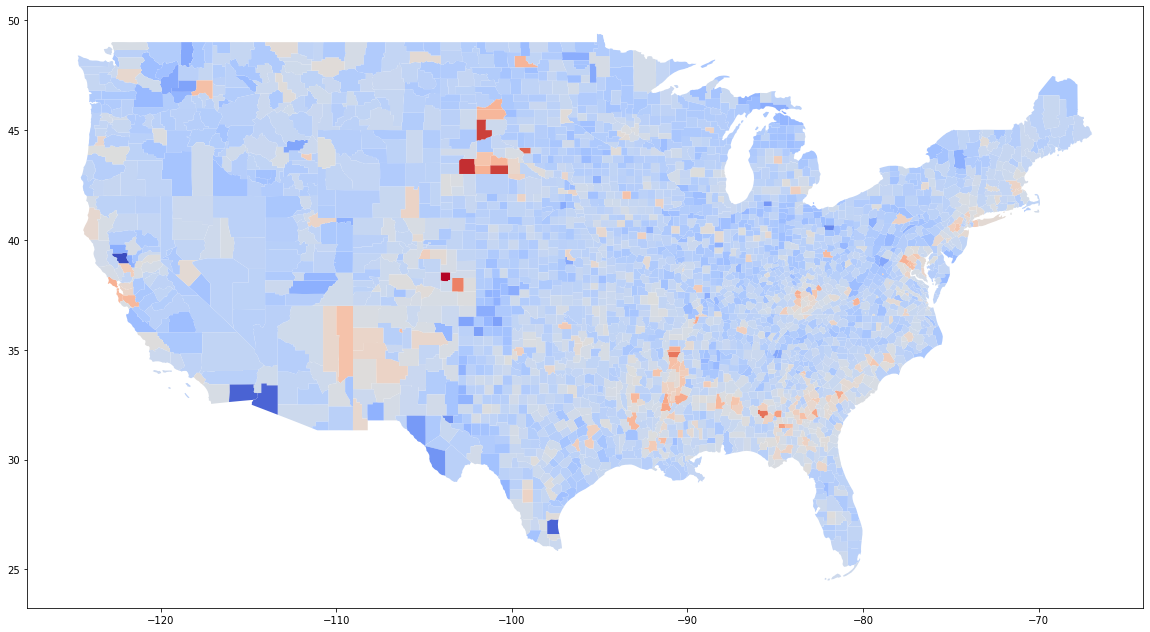

In [94]:
# Looking at geographic distribution of errors - a few clear outliers and some areas of reduced performance in the Bay Area, Boswash, and Deep South
data_geo.plot(column='error', cmap='coolwarm', figsize=(20,20));

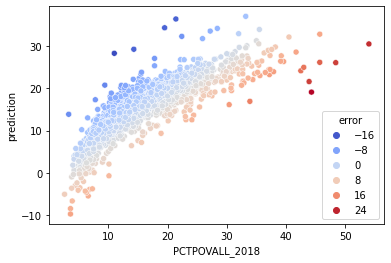

In [95]:
# Plotting predictions against actual - there's a slight curve to the plot and additional error is being
# introduced by some negative poverty predictions, which are obviously impossible
sns.scatterplot(x=y, y=data['prediction'], hue=data['error'], palette='coolwarm');

In [96]:
# Let's see if polynomial features can handle that curve. Using interactions only to limit the number of features and preserve some interpretability.
poly = PolynomialFeatures(interaction_only=True)

In [97]:
# Training a model with polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train_poly_scaled = ss.fit_transform(X_train_poly)
X_test_poly_scaled = ss.transform(X_test_poly)
linreg2 = LinearRegression()
linreg2.fit(X_train_poly_scaled, y_train)

LinearRegression()

In [98]:
# Much better, but is it overfit?
linreg2.score(X_train_poly_scaled, y_train)

0.8100775508962853

In [99]:
# Not very overfit! Much better than without polynomial features
linreg2.score(X_test_poly_scaled, y_test)

0.792030692600304

In [100]:
# Generating predictions again but with the polynomial model
X_poly = poly.transform(X)
X_poly_scaled = ss.transform(X_poly)
data['prediction_poly'] = linreg2.predict(X_poly_scaled)

In [101]:
# Calculating an error column again but with the polynomial model
data['error_poly'] = data['PCTPOVALL_2018'] - data['prediction_poly']

In [102]:
# Re-creating a GeoDataFrame version for quick mapping
data_geo = gpd.GeoDataFrame(data)

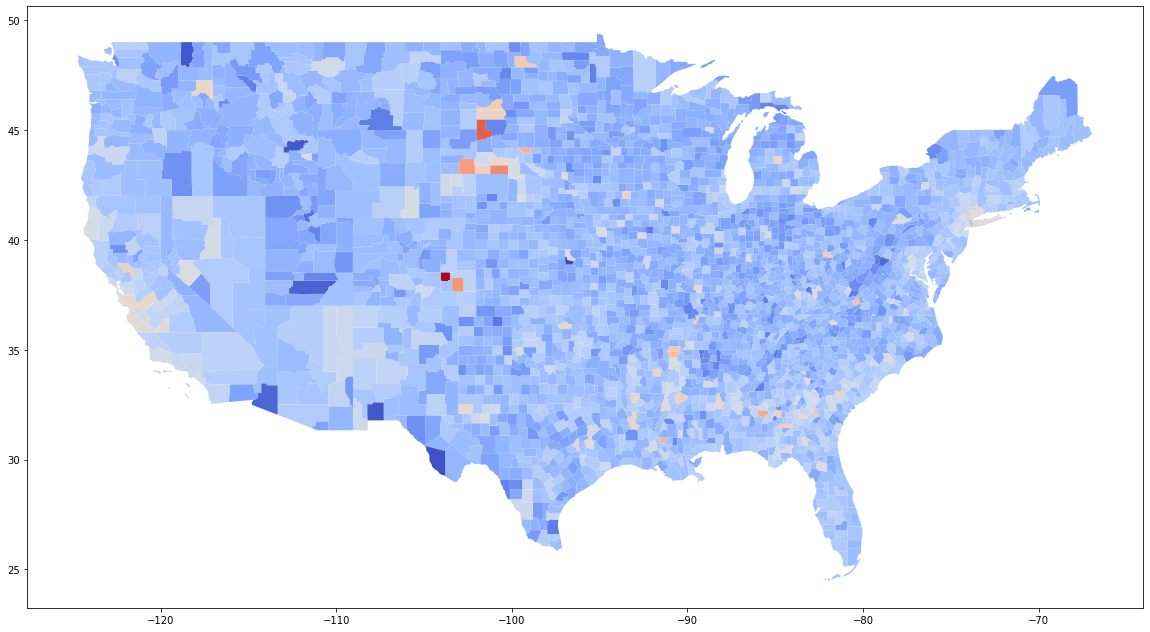

In [103]:
# Geographic distribution of errors with poly - the few outliers are still bad but we're seeing fewer areas of consistent low performance
data_geo.plot(column='error_poly', cmap='coolwarm', figsize=(20,20));

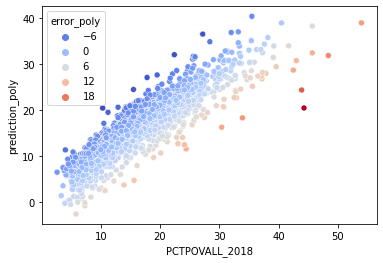

In [104]:
# Plotting it again to see how the error looks - this looks pretty good! Just a very slight curve now. 
sns.scatterplot(x=y, y=data['prediction_poly'], hue=data['error_poly'], palette='coolwarm');

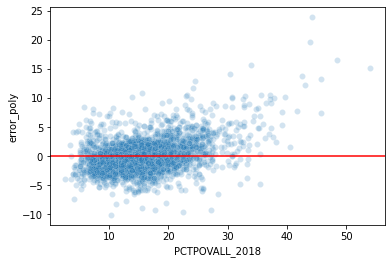

In [105]:
# Still definitely underestimating at higher poverty values. 
sns.scatterplot(x=y, y=data['error_poly'], alpha=0.2)
plt.axhline(color='r');

In [106]:
# Curious what those few more major errors are
data.sort_values(by='error_poly', ascending=False).head()

,FIPS Code,State,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",POP_ESTIMATE_2010,POP_ESTIMATE_2018,R_NATURAL_INC_2018,R_NET_MIG_2018,PCTPOVALL_2018,Unemployment_rate_2010,Unemployment_rate_2018,Median_Household_Income_2018,geometry,Unemployment_change,Population_percent_change,Economic_typology_2015_1,Economic_typology_2015_2,Economic_typology_2015_3,Economic_typology_2015_4,Economic_typology_2015_5,prediction,error,prediction_poly,error_poly
8025,08025,CO,Crowley County,8,7,15.2,41.7,33.5,9.6,5861,5858,-2.7,12.9,44.3,9.1,4.4,35880,"POLYGON ((-104.05392 38.52239, -103.61299 38.5...",-4.7,-0.000512,0,0,0,1,0,19.101742,25.198258,20.422710,23.877290
46137,46137,SD,Ziebach County,8,7,15.9,37.6,30.2,16.3,2825,2742,-0.7,-3.3,43.9,5.8,5.1,32341,"POLYGON ((-101.99999 45.03827, -101.99979 45.4...",-0.7,-0.029381,1,0,0,0,0,21.588168,22.311832,24.321649,19.578351
46121,46121,SD,Todd County,9,12,22.1,29.5,32.5,15.8,9643,10283,12.3,-8.6,48.4,7.7,6.2,31876,"POLYGON ((-101.22818 43.38918, -100.25209 43.3...",-1.5,0.066369,0,0,0,1,0,26.051159,22.348841,31.811006,16.588994
8011,08011,CO,Bent County,7,12,14.2,48.6,24.7,12.4,6500,5882,-2.4,6.5,33.9,8.1,3.2,37659,"POLYGON ((-103.39994 38.26543, -102.74233 38.2...",-4.9,-0.095077,1,0,0,0,0,16.916997,16.983003,18.270719,15.629281
46102,46102,SD,Oglala Lakota County,6,6,24.0,25.3,38.9,11.8,13636,14309,7.4,-11.3,54.0,12.9,10.3,31662,"POLYGON ((-103.00107 43.60580, -102.90250 43.6...",-2.6,0.049355,0,0,0,1,0,30.465944,23.534056,38.906045,15.093955


In [107]:
# It seems these counties all have some external factor - for instance, Crowley County has a low population but a large state prison, giving Crowley County
# the highest proportion of the populated incarcerated in the country. Ziebach, Todd, and Oglala Lakota counties are both entirely within Indian Reservations. 
# Bent County appears to host a low population and a large correctional facility. 

In [108]:
# Making a quick dictionary of coefficients for the poly model this time
coef_dict2 = dict()
for i in range(poly.n_output_features_):
    coef_dict2[poly.get_feature_names(features)[i]] = linreg2.coef_[i]

In [109]:
# Sorting it by absolute value of coef to get a list of the top coefs
sorted_coef_dict2 = sorted([(abs(value), key) for (key,value) in coef_dict2.items()], reverse=True)

In [110]:
# Though the model is much better, coefficients on polynomial models are much more difficult to interpret. 
sorted_coef_dict2

[(7.056271773432085,
  'Percent of adults with less than a high school diploma, 2014-18'),
 (6.809217919700965, 'Unemployment_rate_2018'),
 (3.7915615864439753, 'Unemployment_rate_2018 Median_Household_Income_2018'),
 (3.358221689695611,
  'Percent of adults with less than a high school diploma, 2014-18 Median_Household_Income_2018'),
 (2.9293299941363973,
  'Percent of adults with less than a high school diploma, 2014-18 Unemployment_rate_2018'),
 (1.8669720274156605,
  'Median_Household_Income_2018 Population_percent_change'),
 (1.5755218243752327, 'Population_percent_change'),
 (1.5027012793470955, 'R_NATURAL_INC_2018'),
 (1.3958078585662959,
  'Percent of adults with less than a high school diploma, 2014-18 R_NATURAL_INC_2018'),
 (1.038990132720868, 'R_NATURAL_INC_2018 Median_Household_Income_2018'),
 (0.9815633027015296, 'R_NATURAL_INC_2018 Unemployment_rate_2018'),
 (0.8581486454636377, 'R_NET_MIG_2018'),
 (0.830372538752506, 'Unemployment_rate_2018 Population_percent_change'),
 

In [111]:
# Now let's try some clustering! KMeans is up. Let's check some different numbers of clusters. 
sil_list = []
for i in range(3, 25):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    sil_list.append(silhouette_score(X_scaled, kmeans.labels_))
    print(i, kmeans.score(X_scaled), silhouette_score(X_scaled, kmeans.labels_))

3 -14362.35401639589 0.18171033828277228
4 -12977.238903149728 0.1717586031911638
5 -12061.360620497218 0.17380126743556717
6 -11361.847234422385 0.1658207766227463
7 -10742.723577466395 0.14998804883371195
8 -10135.560382723585 0.15127278318508583
9 -9700.060222240054 0.15042099093991249
10 -9361.54827922692 0.13780997850294632
11 -9058.703317548221 0.1443210664423482
12 -8723.778430906048 0.14086956245540458
13 -8435.957951751208 0.14135676105326367
14 -8172.476359129423 0.14747858287335697
15 -7977.876584907209 0.1375441895585594
16 -7814.453072485455 0.1418309447654837
17 -7600.828334401933 0.14188080752648388
18 -7463.678914298762 0.1396234553084888
19 -7276.072571515965 0.14116066510026
20 -7144.074568998541 0.13929860515762912
21 -7002.469960564127 0.13870922312257722
22 -6872.360831155367 0.13618119366722903
23 -6788.752511088432 0.13795885047091005
24 -6659.599144743861 0.13610021243490142


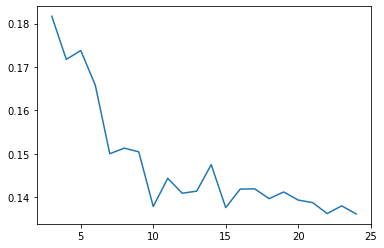

In [112]:
plt.plot(range(3,25), sil_list);

In [113]:
# The silhouette score falls off and then re-peaks at eight clusters and that's about the number of clusters I want for interpretability,
# as <=5 won't give me much to work with, so I'll use eight. The spike at fourteen may be worth a look later, but is too many clusters for regionalization.
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_scaled)

KMeans(random_state=42)

In [114]:
# Sticking cluster labels onto the data as well
data['k_cluster'] = kmeans.labels_

In [115]:
# Re-re-creating a GeoDataFrame version for quick mapping
data_geo = gpd.GeoDataFrame(data)

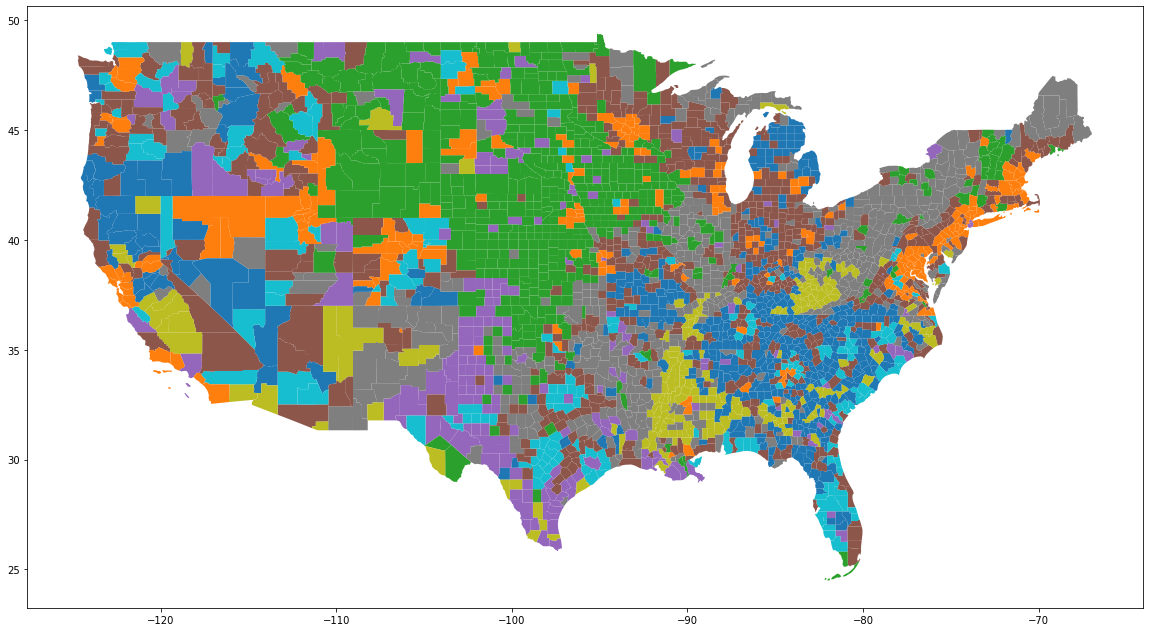

In [116]:
# Map of eight clusters
data_geo.plot(column='k_cluster', cmap='tab10', figsize=(20,20));

In [117]:
# Doing a groupby to look at the stats for each cluster
k_clustered = data.groupby('k_cluster')

In [118]:
# Looking at means for each stat for each cluster - includes things the model didn't see
k_clustered.mean()

,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",POP_ESTIMATE_2010,POP_ESTIMATE_2018,R_NATURAL_INC_2018,R_NET_MIG_2018,PCTPOVALL_2018,Unemployment_rate_2010,Unemployment_rate_2018,Median_Household_Income_2018,Unemployment_change,Population_percent_change,Economic_typology_2015_1,Economic_typology_2015_2,Economic_typology_2015_3,Economic_typology_2015_4,Economic_typology_2015_5,prediction,error,prediction_poly,error_poly
k_cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,5.562500,5.564453,17.206445,38.331445,29.361133,15.099414,40529.552734,40599.638672,-1.837500,5.277734,18.478711,12.821094,4.541211,43523.595703,-8.279883,-0.008079,0.064453,0.019531,0.255859,0.125000,0.115234,18.437990,0.040721,18.615939,-0.137228
1,2.183206,2.255725,7.540840,24.245802,29.439313,38.773664,307864.637405,329678.996183,4.118702,4.390458,8.082443,7.530153,3.147328,82224.442748,-4.382824,0.075994,0.026718,0.045802,0.064885,0.141221,0.125954,5.845172,2.237271,7.375118,0.707324
2,6.675781,7.683594,8.649805,33.742773,34.375781,23.228906,28411.503906,28366.402344,1.032422,-5.517383,11.913086,5.499023,2.937109,54596.160156,-2.561914,-0.021712,0.439453,0.087891,0.093750,0.078125,0.052734,12.453322,-0.540236,12.009266,-0.096180
3,5.643216,6.251256,22.664824,32.036683,28.836181,16.459799,155495.120603,163592.497487,6.837688,-7.714573,18.230151,7.771357,3.876382,48266.517588,-3.894975,0.013453,0.251256,0.190955,0.185930,0.110553,0.015075,19.192462,-0.962311,18.494628,-0.264477
4,3.957831,3.774096,11.216717,33.876958,31.329066,23.577410,125301.478916,130719.298193,1.184036,5.475602,13.115964,9.435090,3.711145,55132.769578,-5.723946,0.028660,0.052711,0.037651,0.209337,0.140060,0.125000,13.547149,-0.431185,13.215112,-0.099148
5,5.520000,5.749091,13.398727,38.164727,30.345455,18.090364,48363.214545,46976.554545,-1.932364,-3.409636,16.924000,9.552909,4.843091,45951.830909,-4.709818,-0.039865,0.127273,0.090909,0.143636,0.161818,0.112727,17.339323,-0.415323,17.059378,-0.135378
6,6.257009,6.747664,23.405607,37.264019,26.363551,12.968224,36227.504673,35998.453271,-0.330841,-8.994393,26.521495,13.517290,6.906542,36627.612150,-6.610748,-0.057387,0.079439,0.126168,0.154206,0.172897,0.023364,24.558635,1.962860,26.075425,0.446070
7,2.743590,2.605128,11.520000,28.101538,32.009231,28.365641,219454.846154,258613.846154,3.513333,22.481026,11.182051,9.167179,3.537949,64414.446154,-5.629231,0.187538,0.035897,0.056410,0.061538,0.087179,0.251282,11.406484,-0.224433,10.872373,0.309678


In [119]:
# And also medians
k_clustered.median()

,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",POP_ESTIMATE_2010,POP_ESTIMATE_2018,R_NATURAL_INC_2018,R_NET_MIG_2018,PCTPOVALL_2018,Unemployment_rate_2010,Unemployment_rate_2018,Median_Household_Income_2018,Unemployment_change,Population_percent_change,Economic_typology_2015_1,Economic_typology_2015_2,Economic_typology_2015_3,Economic_typology_2015_4,Economic_typology_2015_5,prediction,error,prediction_poly,error_poly
k_cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,6.0,6.0,17.60,38.85,29.10,14.40,23176.0,22874.0,-1.75,4.10,18.10,12.50,4.4,43247.0,-8.00,-0.010266,0.0,0.0,0.0,0.0,0.0,18.439435,-0.274875,18.363709,-0.319466
1,1.0,1.0,7.00,24.55,29.50,37.65,141628.5,151196.0,3.90,4.10,7.60,7.40,3.0,79481.0,-4.25,0.071800,0.0,0.0,0.0,0.0,0.0,6.538435,1.481843,7.811035,0.203002
2,7.0,8.0,8.20,34.00,34.75,22.00,9125.0,8841.5,0.70,-4.25,11.40,5.50,2.8,54211.5,-2.50,-0.024244,0.0,0.0,0.0,0.0,0.0,12.403995,-0.771195,11.832292,-0.346501
3,6.0,6.0,22.10,32.10,29.00,15.80,19465.0,19816.0,6.00,-6.40,17.30,7.80,3.8,47202.0,-3.80,0.012456,0.0,0.0,0.0,0.0,0.0,19.342777,-1.638082,18.747939,-0.918622
4,3.0,2.0,10.95,33.70,31.00,22.00,44313.5,45212.0,1.20,4.90,12.70,9.40,3.6,54515.0,-5.70,0.023380,0.0,0.0,0.0,0.0,0.0,13.665809,-0.645870,13.164714,-0.325857
5,6.0,6.0,12.80,37.80,30.25,17.40,22325.0,21615.0,-1.80,-3.10,16.25,9.45,4.8,45937.5,-4.70,-0.038805,0.0,0.0,0.0,0.0,0.0,17.204143,-0.931313,16.861634,-0.443540
6,7.0,7.0,22.70,37.80,26.00,12.65,16807.5,15740.0,-0.55,-8.30,25.60,13.10,6.5,35844.0,-6.50,-0.060932,0.0,0.0,0.0,0.0,0.0,23.783293,1.701176,25.727843,0.158589
7,2.0,2.0,10.70,28.70,32.00,27.50,107653.0,128622.0,3.60,20.70,10.60,8.90,3.4,62389.0,-5.40,0.159596,0.0,0.0,0.0,0.0,0.0,11.452533,-0.533126,10.792434,0.232729


In [120]:
data.dtypes

FIPS Code                                                                     object
State                                                                         object
Area name                                                                     object
2013 Rural-urban Continuum Code                                                int64
2013 Urban Influence Code                                                      int64
Percent of adults with less than a high school diploma, 2014-18              float64
Percent of adults with a high school diploma only, 2014-18                   float64
Percent of adults completing some college or associate's degree, 2014-18     float64
Percent of adults with a bachelor's degree or higher, 2014-18                float64
POP_ESTIMATE_2010                                                              int64
POP_ESTIMATE_2018                                                              int64
R_NATURAL_INC_2018                                               

In [121]:
data['k_cluster'] = data['k_cluster'].astype(str)

In [122]:
data = pd.get_dummies(data=data, prefix='k', columns=['k_cluster'], drop_first=True)

In [123]:
data.head()

,FIPS Code,State,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",POP_ESTIMATE_2010,POP_ESTIMATE_2018,R_NATURAL_INC_2018,R_NET_MIG_2018,PCTPOVALL_2018,Unemployment_rate_2010,Unemployment_rate_2018,Median_Household_Income_2018,geometry,Unemployment_change,Population_percent_change,Economic_typology_2015_1,Economic_typology_2015_2,Economic_typology_2015_3,Economic_typology_2015_4,Economic_typology_2015_5,prediction,error,prediction_poly,error_poly,k_1,k_2,k_3,k_4,k_5,k_6,k_7
1001,01001,AL,Autauga County,2,2,11.3,32.6,28.4,27.7,54754,55601,2.2,0.6,13.8,8.9,3.6,59338,"POLYGON ((-86.91759 32.66417, -86.71339 32.661...",-5.3,0.015469,0,0,0,0,0,12.647536,1.152464,12.073093,1.726907,0,0,0,1,0,0,0
1003,01003,AL,Baldwin County,3,2,9.7,27.6,31.3,31.3,183111,218022,0.1,24.8,9.8,10.0,3.6,57588,"POLYGON ((-88.02632 30.75336, -87.94455 30.827...",-6.4,0.190655,0,0,0,0,1,12.462355,-2.662355,11.434176,-1.634176,0,0,0,0,0,0,1
1005,01005,AL,Barbour County,6,6,27.0,35.7,25.1,12.2,27330,24881,-2.5,-8.6,30.9,12.3,5.2,34382,"POLYGON ((-85.73573 31.62449, -85.66565 31.786...",-7.1,-0.089608,0,0,1,0,0,23.980601,6.919399,27.347968,3.552032,0,0,0,0,0,1,0
1007,01007,AL,Bibb County,1,1,16.8,47.3,24.4,11.5,22872,22400,-0.3,-6.6,21.8,11.4,4.0,46064,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",-7.4,-0.020637,0,0,0,0,0,17.863034,3.936966,17.707441,4.092559,0,0,0,0,0,0,0
1009,01009,AL,Blount County,1,1,19.8,34.0,33.5,12.6,57373,57840,0.3,0.0,13.2,9.8,3.5,50412,"POLYGON ((-86.96336 33.85822, -86.92439 33.909...",-6.3,0.008140,0,0,0,0,0,16.830371,-3.630371,16.505173,-3.305173,0,0,0,0,0,0,0


In [124]:
# creating features and target for linear model WITH clusters
features2 = ['Percent of adults with less than a high school diploma, 2014-18',
            'R_NATURAL_INC_2018',
            'R_NET_MIG_2018',
            'Unemployment_rate_2018', 
            'Median_Household_Income_2018',
            'Unemployment_change', 
            'Population_percent_change',
            'k_1',
             'k_2',
             'k_3',
             'k_4',
             'k_5',
             'k_6',
             'k_7'
           ]
X2 = data[features2]
y2 = data['PCTPOVALL_2018']

In [125]:
# Just doing everything again with new variables including the clusters
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42)
poly2 = PolynomialFeatures(interaction_only=True)
X_train_poly2 = poly2.fit_transform(X_train2)
X_test_poly2 = poly2.transform(X_test2)
X_train_poly_scaled2 = ss.fit_transform(X_train_poly2)
X_test_poly_scaled2 = ss.transform(X_test_poly2)
linreg3 = LinearRegression()
linreg3.fit(X_train_poly_scaled2, y_train2)

LinearRegression()

In [126]:
# Better than the original poly model training score - promising
linreg3.score(X_train_poly_scaled2, y_train2)

0.8500381837637336

In [127]:
# Not significantly overfit in spite of the larger number of features
linreg3.score(X_test_poly_scaled2, y_test2)

0.8206701115911381

In [128]:
# MSE without clusters
mean_squared_error(y_test, linreg2.predict(X_test_poly_scaled))

7.54738544045244

In [129]:
# MSE with clusters
mean_squared_error(y_test2, linreg3.predict(X_test_poly_scaled2))

6.508036237355778

In [130]:
# The linear model using the clusters is marginally better at predicting poverty - excellent

In [131]:
# Because we did it for the other two models, let's create columns of predictions and errors with the cluster model
X_poly2 = poly2.transform(X2)
X_poly_scaled2 = ss.transform(X_poly2)
data['prediction_cluster'] = linreg3.predict(X_poly_scaled2)
data['error_cluster'] = data['PCTPOVALL_2018'] - data['prediction_cluster']

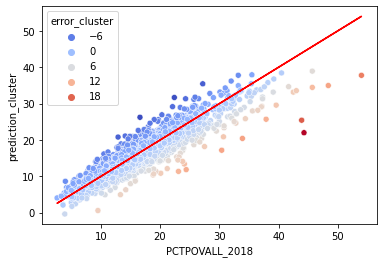

In [132]:
# That looks pretty darn good
sns.scatterplot(x=y, y=data['prediction_cluster'], hue=data['error_cluster'], palette='coolwarm')
plt.plot(y, y, color='r');

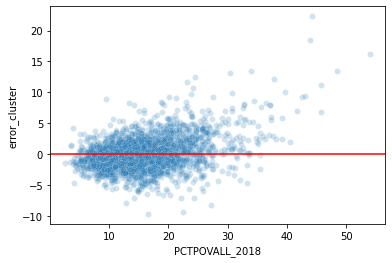

In [133]:
# Still some underestimation at high poverty, but it's largely confined to a handful of extreme cases
sns.scatterplot(x=y, y=data['error_cluster'], alpha=0.2)
plt.axhline(color='r');

In [134]:
# Making a quick dictionary of coefficients for the poly model this time
coef_dict = dict()
for i in range(poly2.n_output_features_):
    coef_dict[poly2.get_feature_names(features2)[i]] = linreg3.coef_[i]

In [135]:
# Sorting it by absolute value of coef to get a list of the top coefs
sorted_coef_dict = sorted([(abs(value), key) for (key,value) in coef_dict.items()], reverse=True)

In [136]:
# Looks like the clusters and their interaction terms played a pretty significant role, though interactions between different clusters are pointless and should probably have been excluded. 
sorted_coef_dict

[(9.65780805349924, 'Median_Household_Income_2018 k_1'),
 (6.2843044092303435, 'k_1'),
 (6.120485220797617, 'Median_Household_Income_2018'),
 (4.525243188357844, 'Median_Household_Income_2018 k_2'),
 (4.5157462444128065, 'k_6'),
 (4.459866633464799, 'Median_Household_Income_2018 k_7'),
 (4.079699773441832, 'Unemployment_rate_2018'),
 (3.865523274272163, 'Median_Household_Income_2018 k_4'),
 (3.605615186748199, 'k_2'),
 (3.189165417791425, 'R_NATURAL_INC_2018'),
 (3.0293359117777063, 'k_7'),
 (2.7407621989314226, 'k_4'),
 (2.3733517139383746, 'Unemployment_rate_2018 k_6'),
 (2.3183520595916582, 'R_NET_MIG_2018'),
 (2.2199101124850347, 'Median_Household_Income_2018 k_6'),
 (1.9977341503821886, 'Median_Household_Income_2018 Unemployment_change'),
 (1.8432673235939137, 'R_NATURAL_INC_2018 Median_Household_Income_2018'),
 (1.7905775347380624, 'Population_percent_change'),
 (1.7892008726472945, 'Unemployment_rate_2018 Median_Household_Income_2018'),
 (1.7785378438236141,
  'Percent of adults

In [137]:
# I want to add the scaled versions of my features to my dataframe for use in visualizations
# Adding "scaled" suffix to column names and concatenating back onto main dataframe
scaled_data = pd.DataFrame(data=X_scaled, columns=features)
scaled_data.set_index(data.index, inplace=True)

In [138]:
data = data.join(scaled_data, rsuffix='_scaled')

In [139]:
# Gotta put the non-dummy version of the cluster column back for analysis and viz
data['k_cluster'] = kmeans.labels_
data['k_cluster'] = data['k_cluster'].astype(str)

In [140]:
# Looks good
data.head()

,FIPS Code,State,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",POP_ESTIMATE_2010,POP_ESTIMATE_2018,R_NATURAL_INC_2018,R_NET_MIG_2018,PCTPOVALL_2018,Unemployment_rate_2010,Unemployment_rate_2018,Median_Household_Income_2018,geometry,Unemployment_change,Population_percent_change,Economic_typology_2015_1,Economic_typology_2015_2,Economic_typology_2015_3,Economic_typology_2015_4,Economic_typology_2015_5,prediction,error,prediction_poly,error_poly,k_1,k_2,k_3,k_4,k_5,k_6,k_7,prediction_cluster,error_cluster,"Percent of adults with less than a high school diploma, 2014-18_scaled",R_NATURAL_INC_2018_scaled,R_NET_MIG_2018_scaled,Unemployment_rate_2018_scaled,Median_Household_Income_2018_scaled,Unemployment_change_scaled,Population_percent_change_scaled,k_cluster
1001,01001,AL,Autauga County,2,2,11.3,32.6,28.4,27.7,54754,55601,2.2,0.6,13.8,8.9,3.6,59338,"POLYGON ((-86.91759 32.66417, -86.71339 32.661...",-5.3,0.015469,0,0,0,0,0,12.647536,1.152464,12.073093,1.726907,0,0,0,1,0,0,0,11.885053,1.914947,-0.342462,0.363416,-0.041775,-0.354954,0.479181,-0.020456,0.090087,4
1003,01003,AL,Baldwin County,3,2,9.7,27.6,31.3,31.3,183111,218022,0.1,24.8,9.8,10.0,3.6,57588,"POLYGON ((-88.02632 30.75336, -87.94455 30.827...",-6.4,0.190655,0,0,0,0,1,12.462355,-2.662355,11.434176,-1.634176,0,0,0,0,0,0,1,12.036854,-2.236854,-0.596126,-0.160007,2.100510,-0.354954,0.353220,-0.477343,2.358389,7
1005,01005,AL,Barbour County,6,6,27.0,35.7,25.1,12.2,27330,24881,-2.5,-8.6,30.9,12.3,5.2,34382,"POLYGON ((-85.73573 31.62449, -85.66565 31.786...",-7.1,-0.089608,0,0,1,0,0,23.980601,6.919399,27.347968,3.552032,0,0,0,0,0,1,0,28.629272,2.270728,2.146612,-0.808053,-0.856197,0.781875,-1.317103,-0.768089,-1.270458,6
1007,01007,AL,Bibb County,1,1,16.8,47.3,24.4,11.5,22872,22400,-0.3,-6.6,21.8,11.4,4.0,46064,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",-7.4,-0.020637,0,0,0,0,0,17.863034,3.936966,17.707441,4.092559,0,0,0,0,0,0,0,17.377118,4.422882,0.529507,-0.259706,-0.679149,-0.070747,-0.476256,-0.892695,-0.377411,0
1009,01009,AL,Blount County,1,1,19.8,34.0,33.5,12.6,57373,57840,0.3,0.0,13.2,9.8,3.5,50412,"POLYGON ((-86.96336 33.85822, -86.92439 33.909...",-6.3,0.008140,0,0,0,0,0,16.830371,-3.630371,16.505173,-3.305173,0,0,0,0,0,0,0,14.846834,-1.646834,1.005126,-0.110157,-0.094889,-0.426006,-0.163295,-0.435808,-0.004815,0


In [141]:
# Saving what I have so far
data.to_csv('../data/processed2.csv', index=False)

In [142]:
# This predictive model is pretty rudimentary, but demonstrates the ability of clustering to create statistically significant grouping which can enhance both analysis and prediction